# Pymaceuticals Inc.
---

### Analysis

- 249 mouses were found to have tumors and they were treated. About half of the mouses were Male (50.6%) and the other half were Female mouses (49.4%). 
- Capomulin and Ramicanen are treatments that both had the smallest Tumor Volume Mean, Variance and Standard Deviation.
In addition, Capomulin treatment had a regression of 0.84 ]between the Tumor Volume and Weight. Meaning that the bigger the mouse, the bigger the tumor it had. 
- There was just one outlier in the box plot and it was from the Infubinol treatment. Infubinol and Ceftamin had a higher Tumor Volume than that ranged from 47-72. Meanwhile, Caponulin and Ramicane had a lower range from 22-47 of the Tumor Volumr.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
combine_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice=combine_df["Mouse ID"].nunique()
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = combine_df.loc[combine_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = combine_df[combine_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df[combine_df["Mouse ID"]!="g989"]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = combine_df.groupby("Drug Regimen")
tumor_mean = regimen_df["Tumor Volume (mm3)"].mean()
tumor_median = regimen_df["Tumor Volume (mm3)"].median()
tumor_var = regimen_df["Tumor Volume (mm3)"].var()
tumor_stdev = regimen_df["Tumor Volume (mm3)"].std()
tumor_SEM = regimen_df["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame([tumor_mean,tumor_median,tumor_var,tumor_stdev,tumor_SEM]).T
summary_df.columns = ["Tumor Volume Mean",
                      "Tumor Volume Median",
                      "Tumor Volume Variance",
                      "Tumor Volume Std. Dev.",
                      "Tumor Volume Std. Err."]
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
aggregations = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}

# Using the aggregation method, produce the same summary statistics in a single line
combine_df.groupby("Drug Regimen").agg(aggregations)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

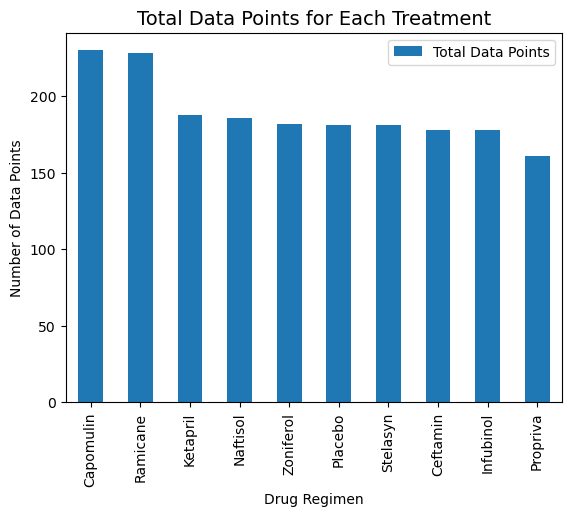

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_datapoints = regimen_df["Drug Regimen"].count()
total_datapoints_df = pd.DataFrame(total_datapoints)
total_datapoints_df.columns = ["Total Data Points"]
total_datapoints_plot = total_datapoints_df.sort_values("Total Data Points", ascending = False).plot(kind="bar")
total_datapoints_plot.set_xlabel("Drug Regimen")
total_datapoints_plot.set_ylabel("Number of Data Points")
plt.title("Total Data Points for Each Treatment", fontsize = 14)
plt.show()

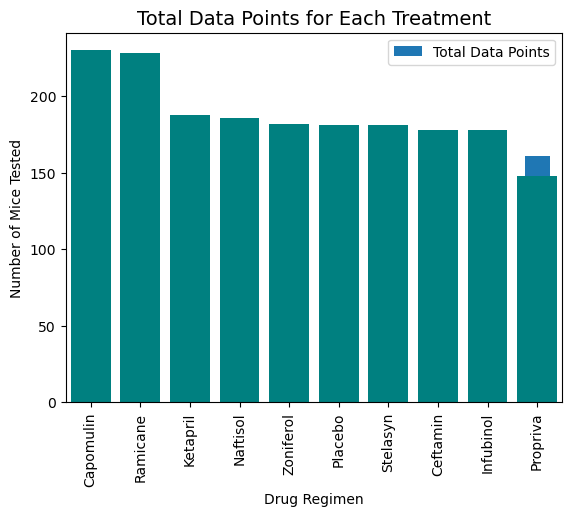

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

total_datapoints_plot = total_datapoints_df.sort_values("Total Data Points", ascending = False).plot(kind="bar")
plt.title("Total Data Points for Each Treatment", fontsize = 14)
x_axis = clean_df["Drug Regimen"].unique()
y_axis = clean_df["Drug Regimen"].value_counts()
plt.bar(x_axis,y_axis, color='teal')
x_ticks = clean_df["Drug Regimen"].unique()
plt.xlabel("Drug Regimen")
plt.xticks(x_ticks,rotation = 'vertical')
plt.ylabel("Number of Mice Tested")
plt.show()

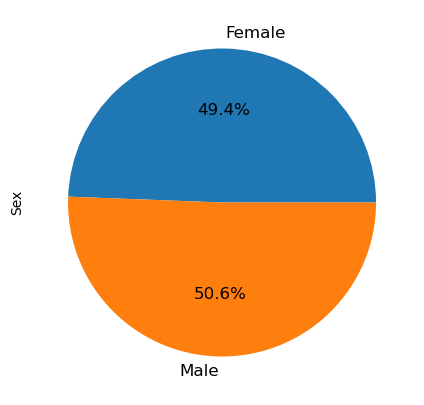

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = combine_df.groupby("Sex")
gender_count = gender_df["Sex"].count()
gender_plot = gender_count.plot(kind = "pie", y = "Sex", autopct="%1.1f%%", fontsize=12, figsize=(5, 5))

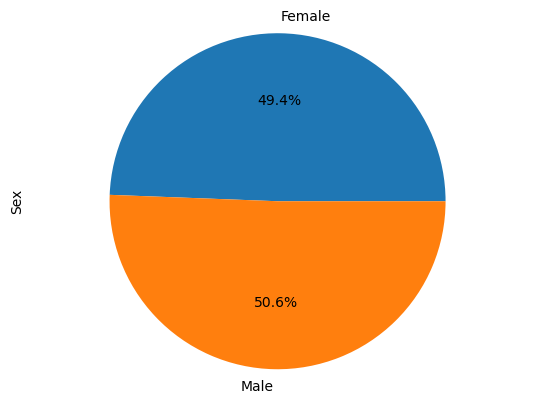

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
count = [gender_count["Female"],gender_count["Male"]]
plt.pie(count, labels = labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combine_df.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(last_timepoint_df, combine_df, on = ["Mouse ID","Timepoint"])
tumor_volume_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatments:
    volume_df = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"]==drugs]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
treatments

# for drugs in treatments:
outlier_list = []
quartiles = volume_df.quantile([0.25,0.5,0.75])
iqr = quartiles[0.75] - quartiles[0.25]
lower_bound = quartiles[0.25] - (1.5*iqr)
upper_bound = quartiles[0.75] + (1.5*iqr)

print(f"\n{treatments}:")
print(f"The lower quartile of tumor volume is: {lower_bound}.")
print(f"The upper quartile of tumor volume is: {upper_bound}.")
print(f"The interquartile range of tumor volume is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")
lower_bound = lower_bound - (1.5*iqr)
upper_bound = upper_bound + (1.5*iqr)
print(f"Values below {lower_bound} would be outliers.")
print(f"Values above {upper_bound} would be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset     
    # Determine outliers using upper and lower bounds


['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
The lower quartile of tumor volume is: 25.355449580000002.
The upper quartile of tumor volume is: 87.66645829999999.
The interquartile range of tumor volume is: 15.577752179999997.
The median of tumor volume is: 59.85195552.
Values below 1.9888213100000058 would be outliers.
Values above 111.03308656999998 would be outliers.


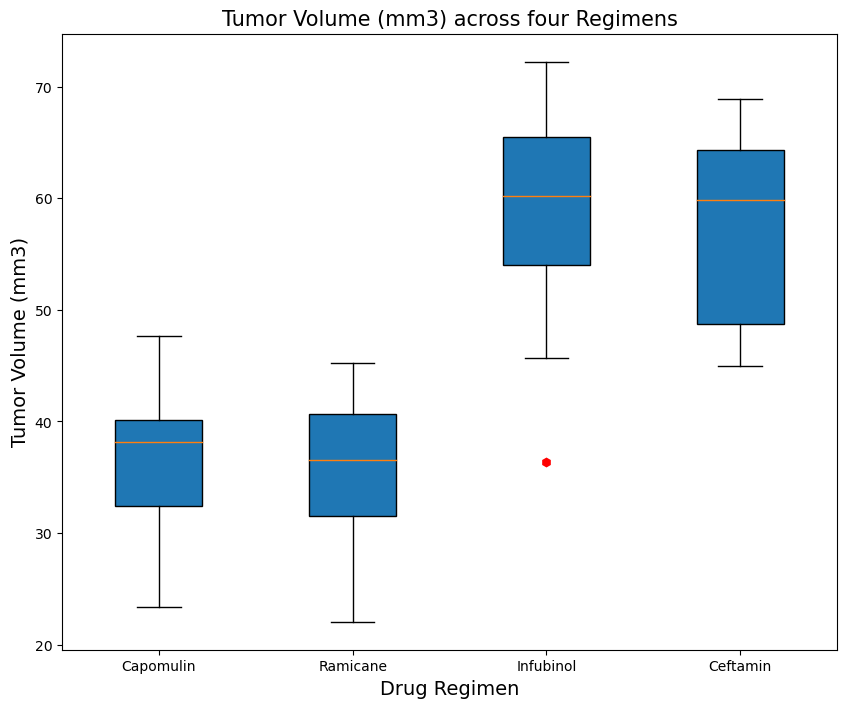

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor="r",marker="h", markeredgecolor="r")
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.boxplot(tumor_vol, flierprops=red_dot, patch_artist=True)
ax1.set_title("Tumor Volume (mm3) across four Regimens",fontsize =15)
ax1.set_xlabel("Drug Regimen",fontsize = 14)
ax1.set_ylabel("Tumor Volume (mm3)",fontsize = 14)
ax1.xaxis.set(ticklabels=treatments)
plt.show()


## Line and Scatter Plots

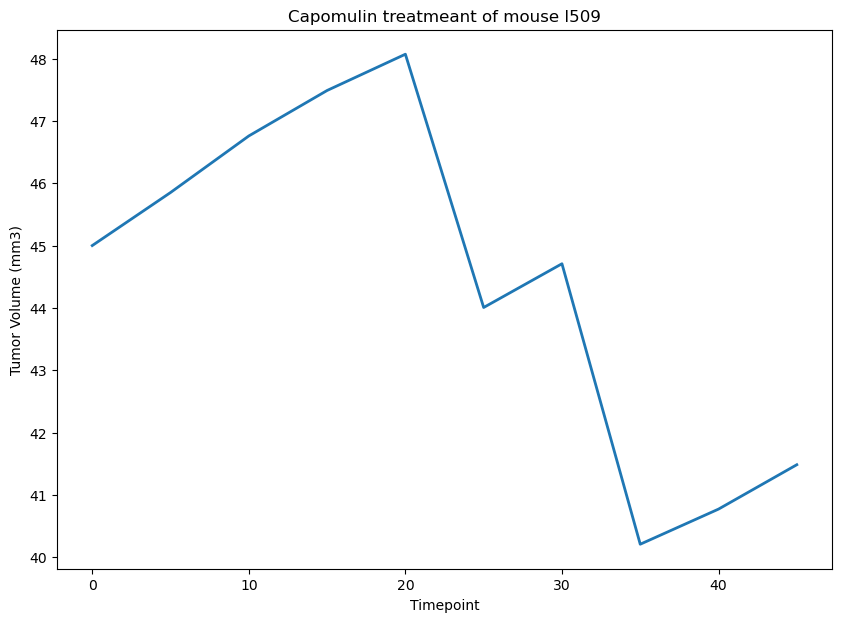

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = clean_df.loc[clean_df["Mouse ID"]== "l509",:]
time = line_df["Timepoint"]
vol = line_df["Tumor Volume (mm3)"] 
plt.figure(figsize=(10,7))
line, = plt.plot(time, vol, linewidth=2, markersize=15)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatmeant of mouse l509")
plt.show()


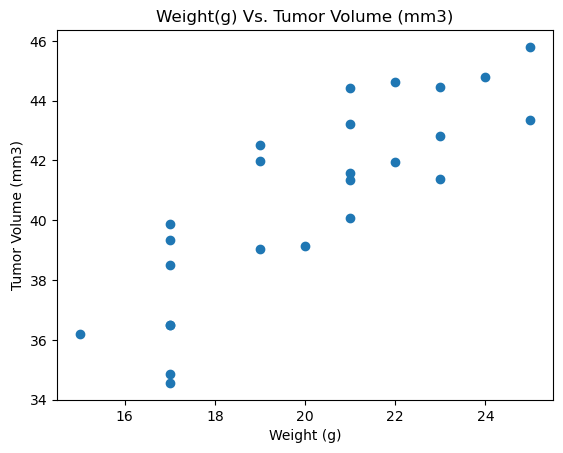

In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

scatter_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
weight_df = scatter_df.groupby("Mouse ID")
avg_vol = weight_df[("Tumor Volume (mm3)")].mean()
weight = weight_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_vol})
plt.scatter(weight, avg_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight(g) Vs. Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

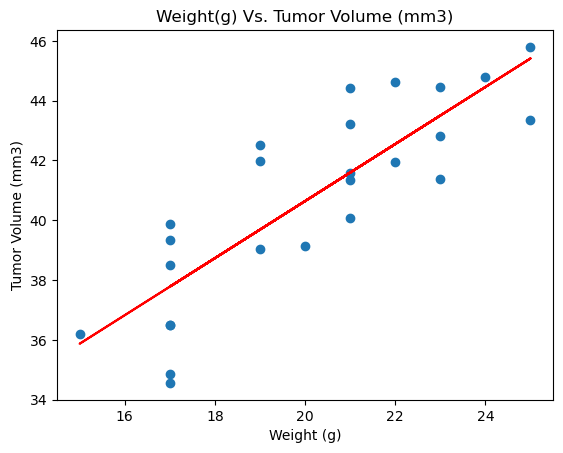

The correlation between mouse weight and the average tumor volume is 0.84


In [53]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight,avg_vol)
x_values=avg_capomulin_df["Weight (g)"]
y_values=avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.title("Weight(g) Vs. Tumor Volume (mm3)")
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
